# Pima Indians Diabetes

- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Introduction

I'll be using tons of header ones as to provide a better navigation in Kaggle.

This is a pretty common dataset for binary classification. And this will be my approach

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Features

They're pretty self-explainatory

```
- Pregnancies
- Glucose
- Blood pressure
- Skin thickness
- Insulin
- BMI (Body Mass Index)
- Diabetes pedigree function
- Age
- Outcome, 0 if negative 1 if positive
```

## References

- https://link.springer.com/article/10.1007/s00521-022-07049-z#Sec20

# Initialization

In [1]:
RANDOM_SEED = 42 #@param {type: 'integer'}

## Imports

In [2]:
import pandas as pd
import numpy as np
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

## Load the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%pip install kaggle -q
%cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/jofaval-kaggle.json" "kaggle.json"
%mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip -o pima-indians-diabetes-database.zip

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [6]:
dataframe = pd.read_csv('diabetes.csv')
dataframe.shape

(768, 9)

In [7]:
target = 'Outcome'
features = [ col for col in dataframe.columns if col not in [target] ]

In [8]:
def readable(
  col: str
) -> str:
  if col.isupper():
    return col

  title = col[0]
  for character in col[1:]:
    if character.isupper():
      title += ' '
    title += character.lower()

  return title

_ = [ print(readable(col)) for col in dataframe.columns ]

Pregnancies
Glucose
Blood pressure
Skin thickness
Insulin
BMI
Diabetes pedigree function
Age
Outcome


# Data Preprocessing

Making sure the data is as model-ready as possible

## Standarization

We're working with full numeric columns here

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataframe.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


## Abnormal values

Anything that does not make sense given the project and data description

In [11]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Everything's as it should here

# Feature Engineering

Creating new features and adding information from existing ones

## Age

It's one of the most important features in this dataset

In [12]:
USE_AGE_FEATURES = True #@param {type:'boolean'}

We'll create three groups of ages

In [13]:
if USE_AGE_FEATURES:
  dataframe['YoungAdult'] = np.where(dataframe['Age'] < 25, 1, 0)
  dataframe['Adult'] = np.where((dataframe['Age'] >= 25) & (dataframe['Age'] < 40), 1, 0)
  dataframe['Senior'] = np.where(dataframe['Age'] >= 40, 1, 0)

## Ns

Straight from:

- https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

In [14]:
USE_VINCENT_FEATURES = True #@param {type:'boolean'}

In [15]:
if USE_VINCENT_FEATURES:
  dataframe.loc[:,'N1']=0
  dataframe.loc[(dataframe['Age']<=30) & (dataframe['Glucose']<=120),'N1']=1
  dataframe.loc[:,'N2']=0
  dataframe.loc[(dataframe['BMI']<=30),'N2']=1
  dataframe.loc[:,'N3']=0
  dataframe.loc[(dataframe['Age']<=30) & (dataframe['Pregnancies']<=6),'N3']=1
  dataframe.loc[:,'N4']=0
  dataframe.loc[(dataframe['Glucose']<=105) & (dataframe['BloodPressure']<=80),'N4']=1
  dataframe.loc[:,'N5']=0
  dataframe.loc[(dataframe['SkinThickness']<=20) ,'N5']=1
  dataframe.loc[:,'N6']=0
  dataframe.loc[(dataframe['BMI']<30) & (dataframe['SkinThickness']<=20),'N6']=1
  dataframe.loc[:,'N7']=0
  dataframe.loc[(dataframe['Glucose']<=105) & (dataframe['BMI']<=30),'N7']=1
  dataframe.loc[:,'N9']=0
  dataframe.loc[(dataframe['Insulin']<200),'N9']=1
  dataframe.loc[:,'N10']=0
  dataframe.loc[(dataframe['BloodPressure']<80),'N10']=1
  dataframe.loc[:,'N11']=0
  dataframe.loc[(dataframe['Pregnancies']<4) & (dataframe['Pregnancies']!=0) ,'N11']=1
  dataframe['N0'] = dataframe['BMI'] * dataframe['SkinThickness']
  dataframe['N8'] =  dataframe['Pregnancies'] / dataframe['Age']
  dataframe['N13'] = dataframe['Glucose'] / dataframe['DiabetesPedigreeFunction']
  dataframe['N12'] = dataframe['Age'] * dataframe['DiabetesPedigreeFunction']
  # dataframe['N14'] = dataframe['Age'] / dataframe['Insulin']

# Exploratory Data Analysis

Hypothesizing and analyzing the dataset, it's distribution and correlation

## Age and pregnancies hypthesis

This may be curiosity more than anything else

### Age and pregnancies

And how they correlate to diabetes

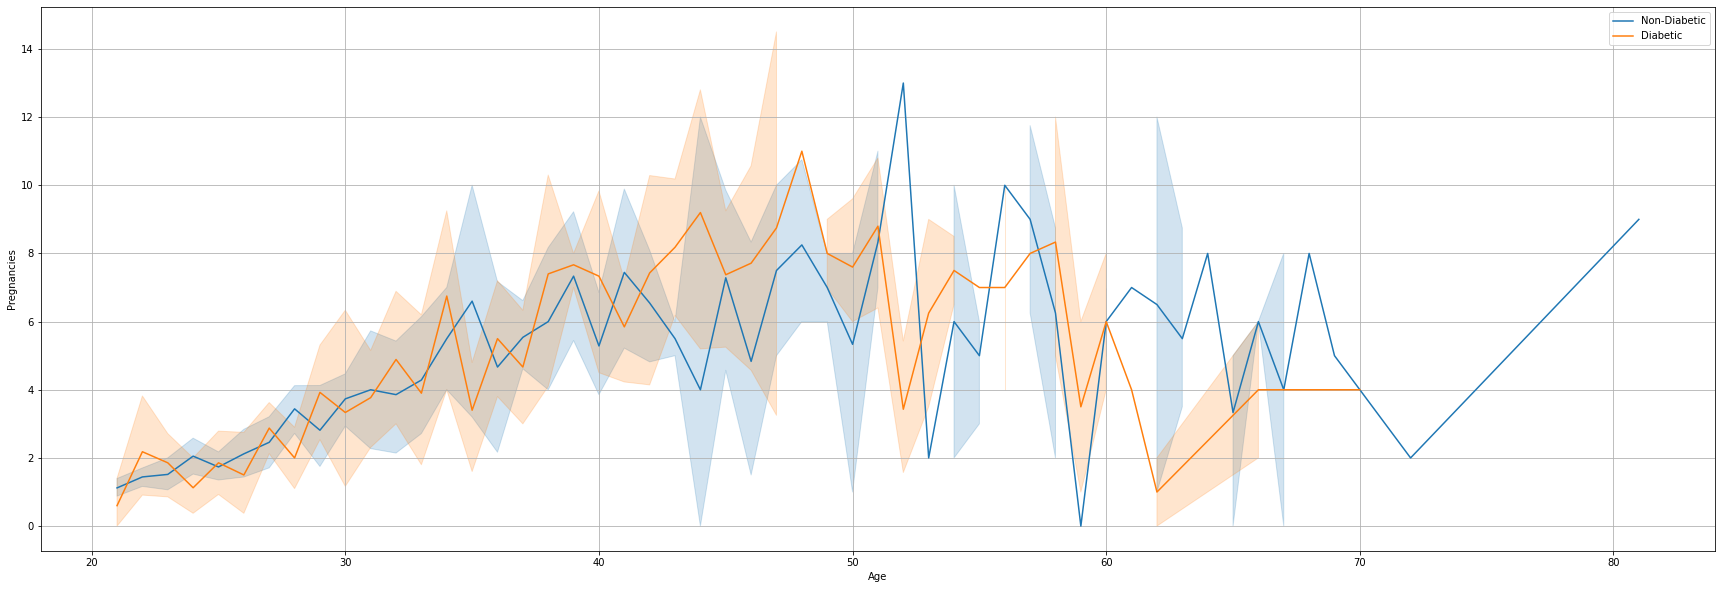

In [16]:
plt.figure(figsize=(30, 10))
plt.grid()
sns.lineplot(data=dataframe, x='Age', y='Pregnancies', hue='Outcome')
plt.legend(['Non-Diabetic', 'Diabetic'])

Middle-aged women have more pregnancies and more diabetes, but, as they gro older, the percentage of diabetes decreases, likely due to decease, but we can't really tell without private information, nor we should.

### Age distribution

To better understand the shape it takes

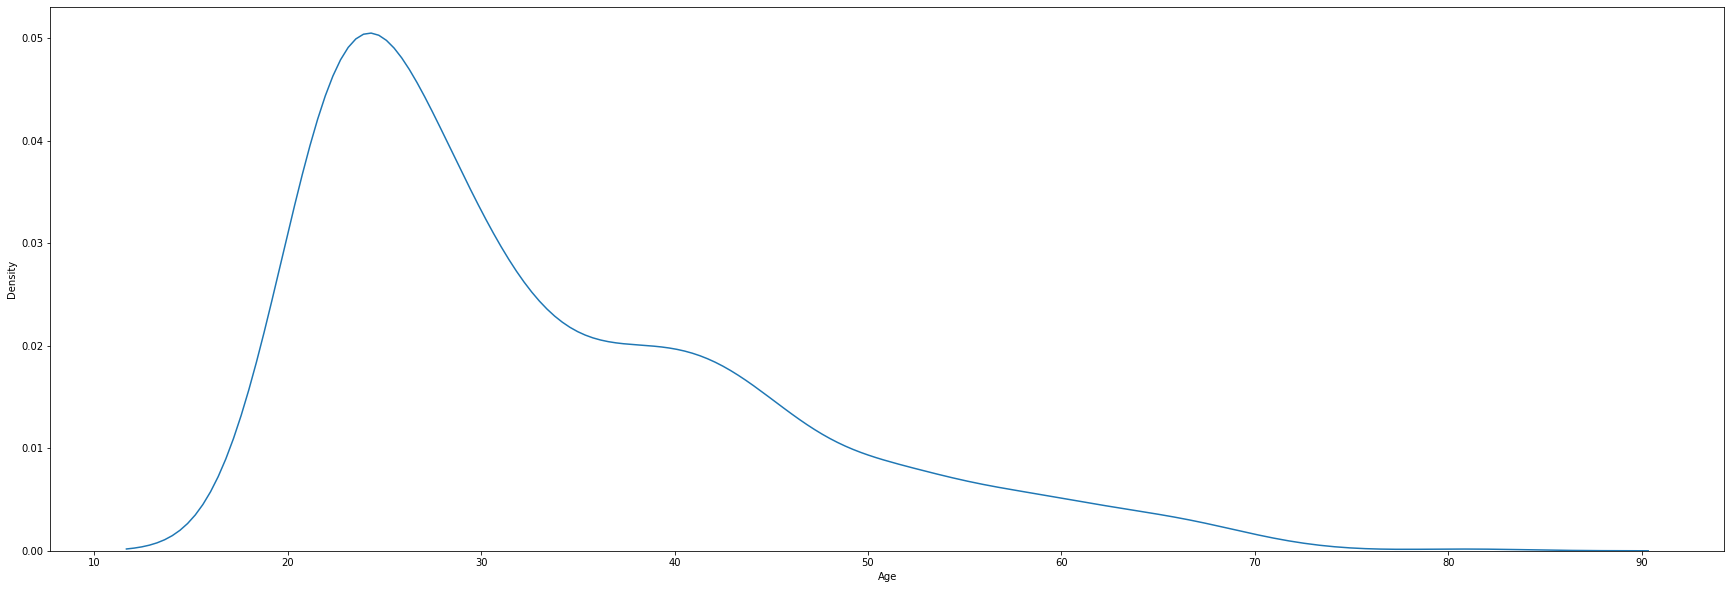

In [17]:
plt.figure(figsize=(30, 10))
sns.kdeplot(data=dataframe, x='Age')

### Younger diabetes detection

Using histograms as to have a better perspective into the details

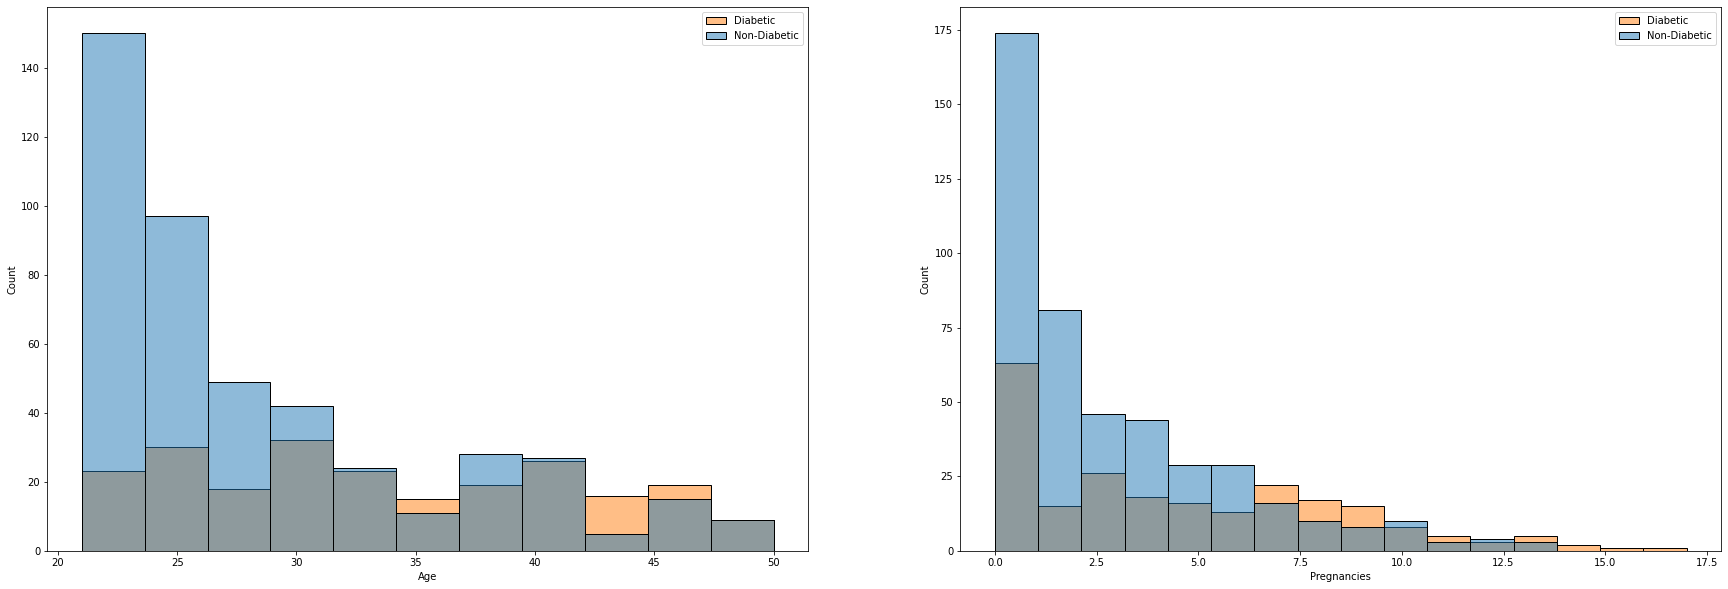

In [18]:
observation_group = dataframe[ dataframe['Age'] <= 50 ]
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(data=observation_group, x='Age', hue='Outcome', ax=axes[0])
axes[0].legend(['Diabetic', 'Non-Diabetic'])
sns.histplot(data=observation_group, x='Pregnancies', hue='Outcome', ax=axes[1])
axes[1].legend(['Diabetic', 'Non-Diabetic'])

## Data Distribution

The variability of the data

I'd rather remove values out of scope, than to mutate them, to create/modify data with fake values is risky, too risky, and we're talking about lifes here, not just numbes.

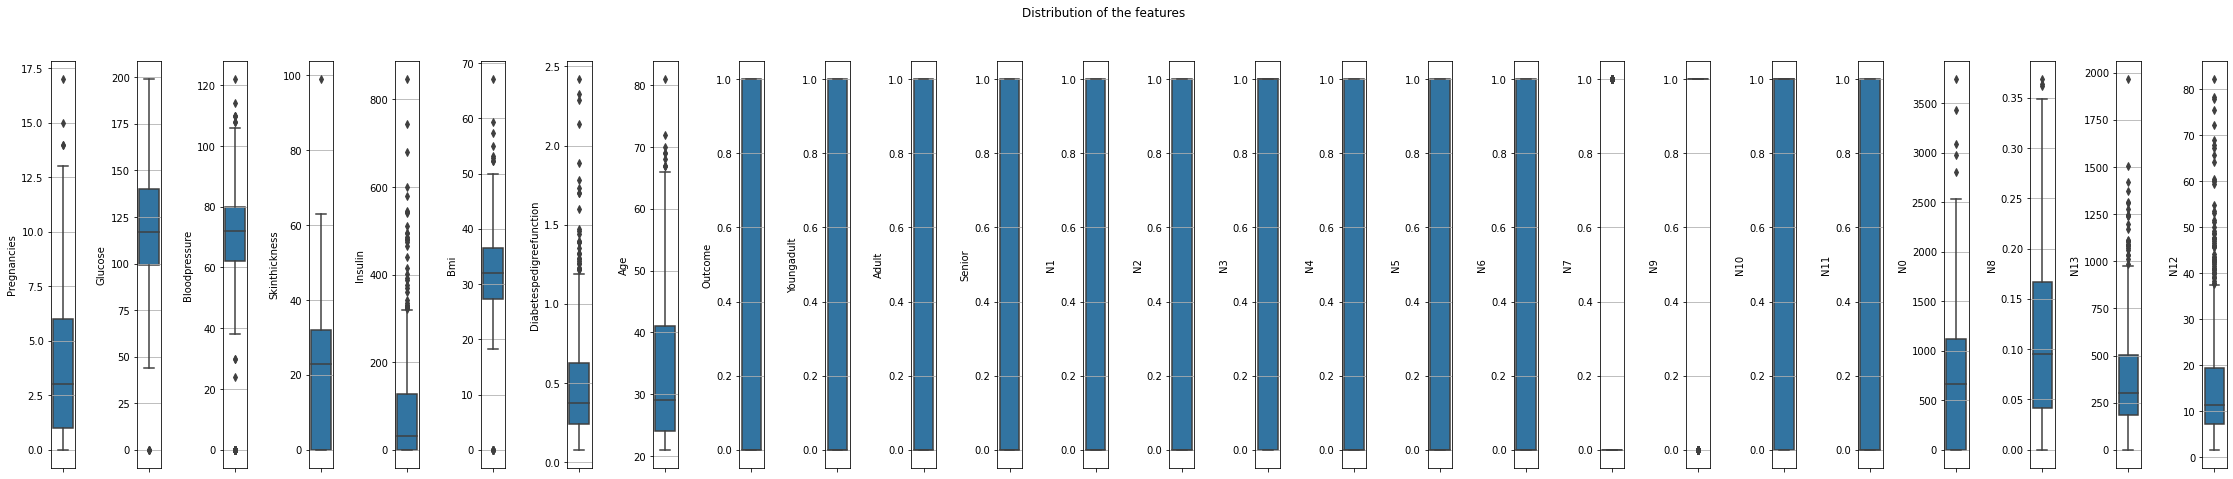

In [19]:
# columns = features
columns = dataframe.columns
n_columns = len(columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
fig.suptitle('Distribution of the features')
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=dataframe, y=col, ax=ax)
  ax.set_ylabel(col.title())

In [20]:
REMOVE_OUTLIERS = True #@param {type:'boolean'}
USE_SCIPY_HANDLING = True #@param {type:'boolean'}
USE_FILTER_HANDLING = True #@param {type:'boolean'}

### Outlier handling

Let us remove the abnormal values that we found, outliers way too out of scope

Using scipy, as per:

https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values#answer-71217012

That referenced:

https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

In [21]:
if REMOVE_OUTLIERS and USE_SCIPY_HANDLING:
  import scipy

  z_scores = scipy.stats.zscore(dataframe)

  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  dataframe = dataframe[filtered_entries]

A more manual way if you'd like

In [22]:
if REMOVE_OUTLIERS and USE_FILTER_HANDLING:
  dataframe = dataframe[ dataframe['Glucose'] > 0 ]
  dataframe = dataframe[ dataframe['BloodPressure'] > 0 ]
  dataframe = dataframe[ dataframe['BMI'] > 0 ]
  # dataframe = dataframe[ dataframe['SkinThickness'] < 80 ]

### Reevaluation

So we now have a cleaner distribution

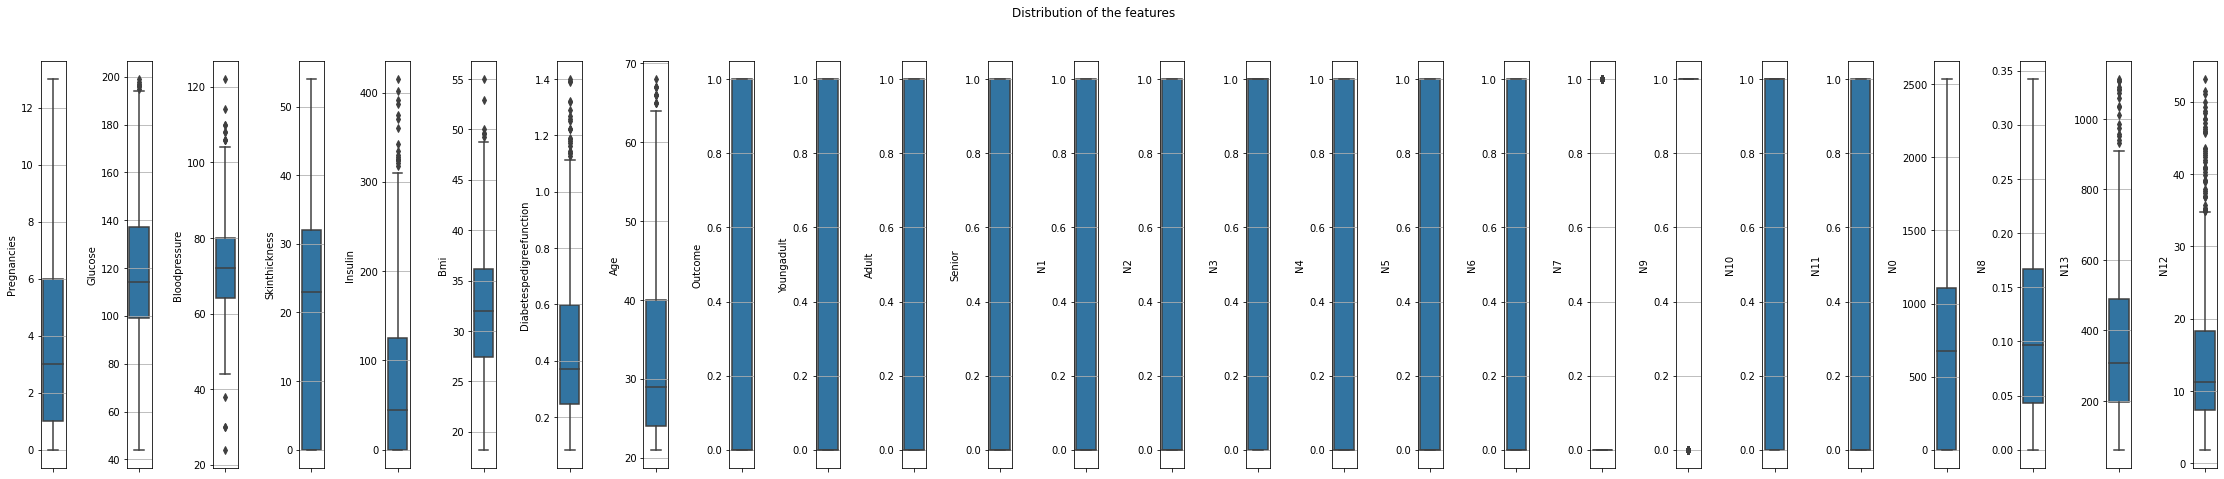

In [23]:
# columns = features
columns = dataframe.columns
n_columns = len(columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
fig.suptitle('Distribution of the features')
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=dataframe, y=col, ax=ax)
  ax.set_ylabel(col.title())

## Correlation

How, statistically speaking, similar two values are, or co-dependant of each other

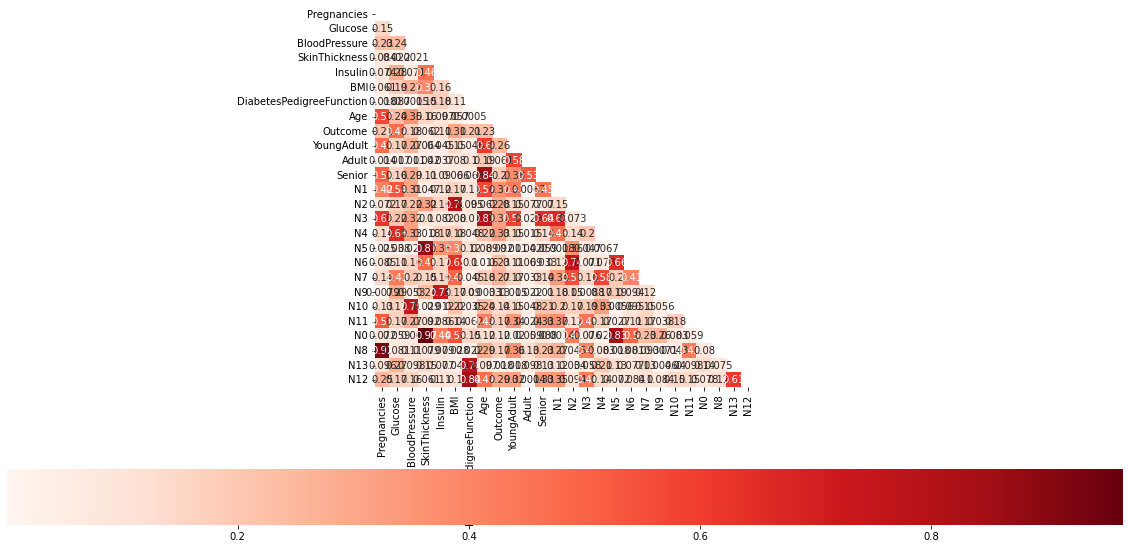

In [24]:
correlation = dataframe.corr().abs()
matrix = np.triu(correlation)

plt.figure(figsize=(20, 10))
_ = sns.heatmap(
  correlation,
  square=True,
  annot=True,
  cmap='Reds',
  cbar=True,
  cbar_kws={'orientation': 'horizontal'},
  mask=matrix,
)
plt.show()

# Data Science

The last touches before implementing the algorithms



## Imports

In [25]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score

## Assignment

Which are the features, and which the target

In [26]:
target = 'Outcome'
features = [ col for col in dataframe.columns if col not in [target] ]

In [27]:
X = dataframe[features]
y = dataframe[target]

## Imbalancement

In classification tasks, an imbalanced dataset is also equal to a biased model. A biased model will perform greatly on the majority but poorly on the minority

We can clearly see that there are more women without diabetes than there are with, luckily

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


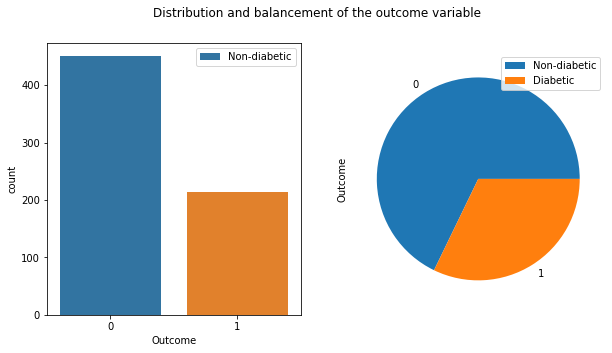

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution and balancement of the outcome variable')

sns.countplot(y, ax=axes[0])
axes[0].legend(['Non-diabetic', 'Diabetic'])

y.value_counts().plot.pie(ax=axes[1])
axes[1].legend(['Non-diabetic', 'Diabetic'])

In [29]:
UNDER_SAMPLE = False #@param {type:'boolean'}
OVER_SAMPLE = True #@param {type:'boolean'}

We can quickly fix it but reducing the number of samples of tha majority

In [30]:
if UNDER_SAMPLE:
  from imblearn.under_sampling import RandomUnderSampler
  X, y = RandomUnderSampler(random_state=RANDOM_SEED).fit_resample(X, y)

But another solution could be to oversample the minority

In [31]:
if OVER_SAMPLE:
  from imblearn.over_sampling import RandomOverSampler
  X, y = RandomOverSampler(random_state=RANDOM_SEED).fit_resample(X, y)

Either way, we end up with an even dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


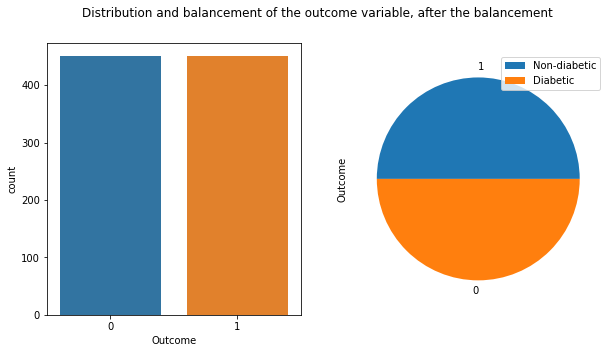

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution and balancement of the outcome variable, after the balancement')

sns.countplot(y, ax=axes[0])
# axes[0].legend(['Non-diabetic', 'Diabetic'])

y.value_counts().plot.pie(ax=axes[1])
axes[1].legend(['Non-diabetic', 'Diabetic'])

## Splitting

When splitting into train and test, we have to be ultra conscious of the dependant variable, if we're not, we would have balanced a dataset for nothing

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED, stratify=y)

We'll need them later on, so let's just manually apply the min-max normalization

In [34]:
X_min = X_train.min()
X_max = X_train.max()

# train
X_train_norm = (X_train - X_min) / (X_max - X_min)
X_train_norm = X_train_norm.fillna(0)
# test
X_test_norm = (X_test - X_min) / (X_max - X_min)
X_test_norm = X_test_norm.fillna(0)

# Helpers

Some utility functions that we'll need later on

## Confusion Matrix

It visualices the model performance on each of the label, it provides the normalized percentage of hits or miss of our model for each outcome.

In [35]:
default_target_names = ['Non-Diabetic', 'Diabetic']

def cmatrix(
  y_test,
  y_pred,
  cmap: str = 'Blues',
  target_names: List[str] = default_target_names,
  title: str = 'Example',
  figsize: Tuple[int, int] = (20, 10)
) -> np.ndarray:
  df_cm = confusion_matrix(y_test, y_pred)
  df_cm = df_cm.astype('float') / df_cm.sum(axis = 1)[:, np.newaxis]

  plt.figure(figsize=figsize)
  _ = sns.heatmap(
    df_cm,
    square=True,
    annot=True,
    annot_kws={'fontsize': 14},
    cmap=cmap,
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True,
    cbar_kws={'orientation': 'horizontal'},
  ).set(
    xlabel='Predicted Class',
    ylabel='Actual Class',
    title=f'{title} - Confusion Matrix'
  )
  plt.show()

## AUC

Area Under the Curve

In [36]:
def auc(
  model: Pipeline = None,
  data: pd.DataFrame = X_test,
  y_true: np.ndarray = y_test,
  probs: np.ndarray = None
) -> float:
  assert model is not None or probs is not None

  if probs is None:
    probs = model.predict_proba(data)[:, 1]

  return roc_auc_score(y_true, probs)

# Logistic Regression

Linear Regression with a logarithmic function applied to it's outcome

In [37]:
from sklearn.linear_model import LogisticRegression

clf_log = make_pipeline(
  # MinMaxScaler(),
  # StandardScaler(),
  MaxAbsScaler(),
  PolynomialFeatures(2),
  LogisticRegression(
    random_state=RANDOM_SEED,
  )
)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

print('normal', clf_log.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_log))
print('auc', auc(clf_log))

normal 0.8342541436464088
balanced 0.8346764346764346
auc 0.8843711843711843


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
clf_log.score(X, y)

0.8381374722838137

### Confusion Matrix

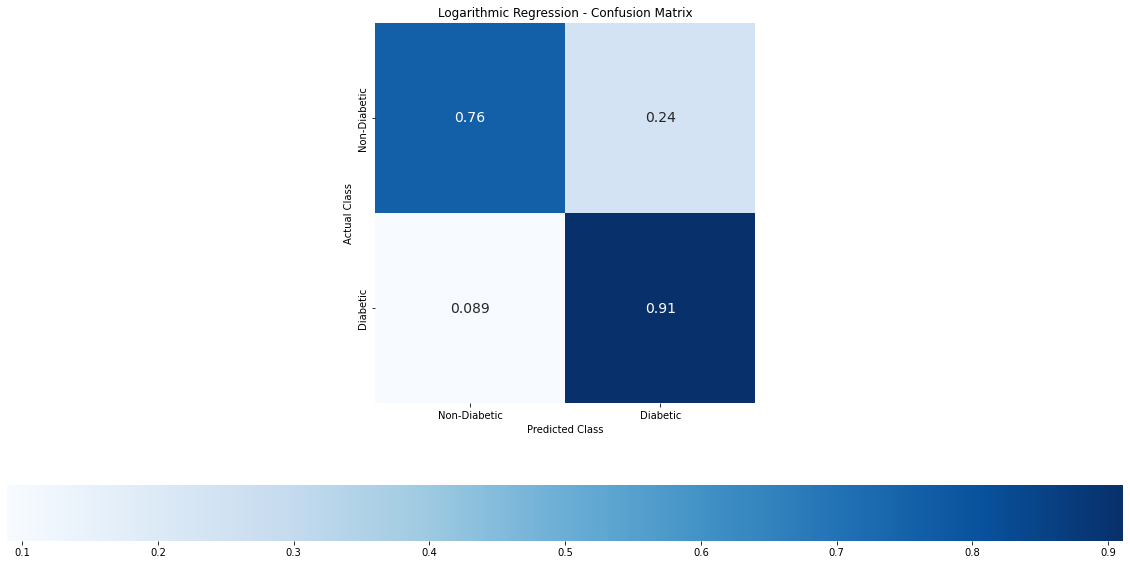

In [39]:
cmatrix(y_test, y_pred_log, title='Logarithmic Regression')

# XGBoost

Gradient boosted regularized ("underfitting" while training for a better performance on the test set) technique

In [40]:
from xgboost import XGBClassifier

clf_xgboost = make_pipeline(
  # MinMaxScaler(),
  # StandardScaler(),
  MaxAbsScaler(),
  PolynomialFeatures(3),
  XGBClassifier(
    random_state=RANDOM_SEED,
    # n_estimators=5,
    # max_depth=7,
    # learning_rate=.01,
    # This will give higher score on the test set, but kinda cheating
    # subsample=.05,
    # colsample_bytree=.8,
  )
)
clf_xgboost.fit(X_train, y_train)
y_pred_xgboost = clf_xgboost.predict(X_test)

print('normal', clf_xgboost.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_xgboost))
print('auc', auc(clf_xgboost))

normal 0.8397790055248618
balanced 0.8402319902319902
auc 0.9372405372405372


In [41]:
clf_xgboost.score(X, y)

0.9512195121951219

## Confusion Matrix

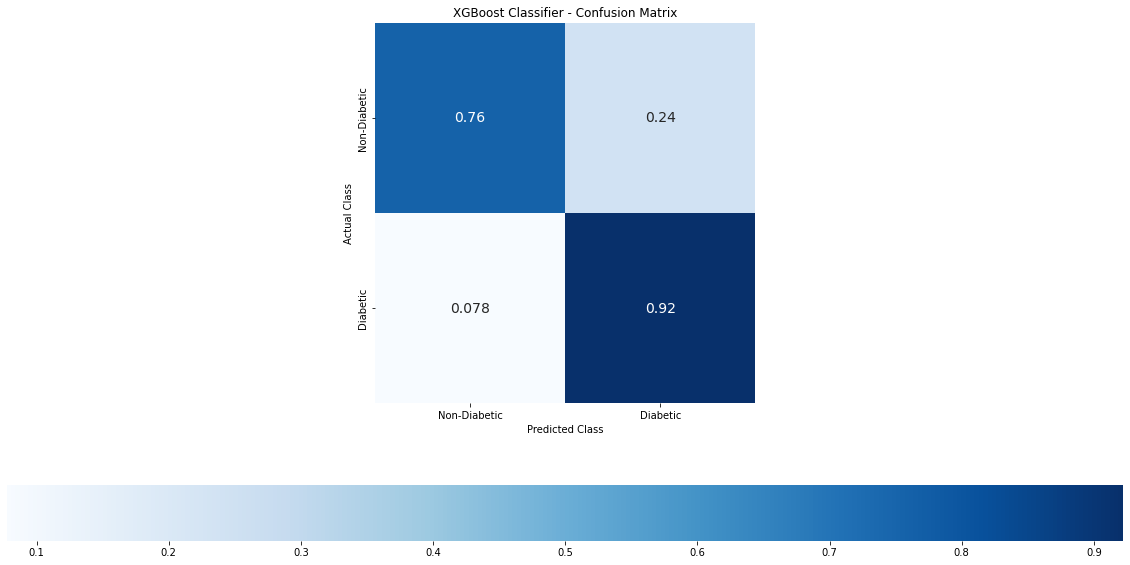

In [42]:
cmatrix(y_test, y_pred_xgboost, title='XGBoost Classifier')

# Neural network

A set of units that read, process and output data through activation (math) functions.

It's over complicated for this case-scenario, or at least, it does feel like it to me.

In [43]:
import tensorflow as tf

def build_tf_model() -> tf.keras.Sequential:
  model = tf.keras.Sequential(
    name='Diabetes-Detection-Classifier',
    layers=[
      tf.keras.layers.Dense(units=256, input_dim=X.shape[1], name='Input-Layer'),
      tf.keras.layers.Dense(units=128, name='Hidden-Layer'),
      tf.keras.layers.Dense(units=64, name='Second-Hidden-Layer'),
      tf.keras.layers.Dense(units=1, activation='sigmoid', name='Output-Layer'),
    ]
  )

  model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.Adam(learning_rate=.001),
    metrics=['accuracy']
  )

  model.summary()

  return model

In [44]:
tf_model = build_tf_model()
history = tf_model.fit(
  X_train_norm,
  y_train,
  validation_split=.1,
  epochs=100,
  # epochs=99,
  # callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
  verbose=0,
)

Model: "Diabetes-Detection-Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (Dense)         (None, 256)               6656      
                                                                 
 Hidden-Layer (Dense)        (None, 128)               32896     
                                                                 
 Second-Hidden-Layer (Dense)  (None, 64)               8256      
                                                                 
 Output-Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 47,873
Trainable params: 47,873
Non-trainable params: 0
_________________________________________________________________


In [45]:
y_pred_tf = tf_model.predict(X_test_norm).reshape(1, -1)[0]
y_pred_tf = np.vectorize(round)(y_pred_tf)

_, tf_accuracy = tf_model.evaluate(X_test_norm, y_test)
print('normal', tf_accuracy)
print('balanced', balanced_accuracy_score(y_test, y_pred_tf))
print('auc', auc(probs=tf_model.predict(X_test_norm)[:, -1]))

6/6 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8232
normal 0.8232043981552124
balanced 0.8234432234432234
auc 0.905982905982906


In [46]:
tf_model.evaluate((X - X_min) / (X_max - X_min), y)

29/29 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.7905


[0.4532605707645416, 0.7904656529426575]

## Confusion Matrix

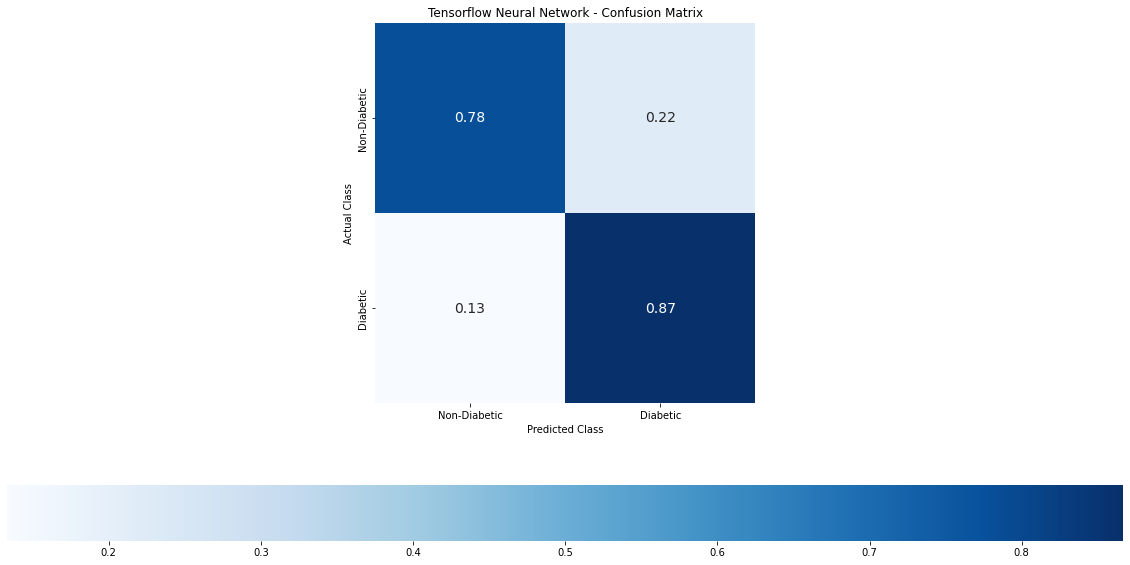

In [47]:
cmatrix(y_test, y_pred_tf, title='Tensorflow Neural Network')

# Naive Bayes

The bayes theorem applied to a Machine Learning algorithm

In [48]:
from sklearn.naive_bayes import GaussianNB

clf_bayes = make_pipeline(
  MinMaxScaler(),
  GaussianNB(
    var_smoothing=.01
  )
)
clf_bayes.fit(X_train, y_train)
y_pred_bayes = clf_bayes.predict(X_test)

print('normal', clf_bayes.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_bayes))
print('auc', auc(clf_bayes))

normal 0.8011049723756906
balanced 0.8015262515262516
auc 0.8755799755799756


In [49]:
clf_bayes.score(X, y)

0.7483370288248337

## Confusion Matrix

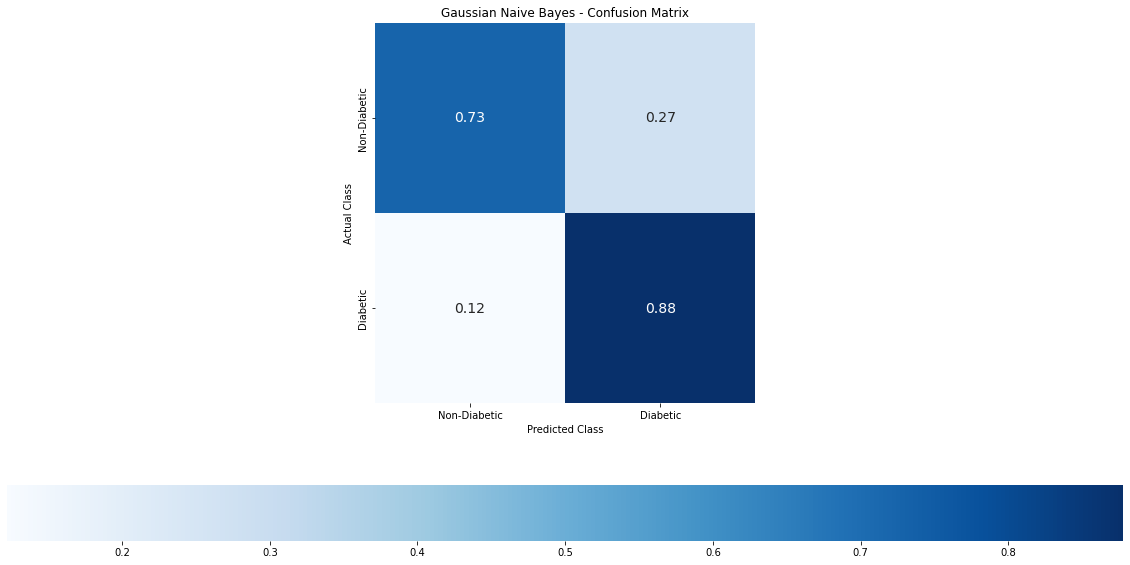

In [50]:
cmatrix(y_test, y_pred_bayes, title='Gaussian Naive Bayes')

# K-Nearest Neighbors

As [IMB](https://www.ibm.com/topics/knn) states: _Uses proximity to make classifications or predictions about the grouping of an individual data point_

In [51]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = make_pipeline(
  MinMaxScaler(),
  # KNeighborsClassifier(n_neighbors=23) # for statistically removed outliers
  # KNeighborsClassifier(n_neighbors=3) # for undersamping
  KNeighborsClassifier(n_neighbors=1)
)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

print('normal', clf_knn.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_knn))
print('auc', auc(clf_knn))

normal 0.8453038674033149
balanced 0.8455433455433455
auc 0.8455433455433455


In [52]:
clf_knn.score(X, y)

0.9689578713968958

## Best number of neighbors

We can quickly plot which is the most optimal number of neighbors for the model to perform at it's best

In [53]:
number_of_neighbors = range(1, 100, 1) # El número de iteraciones que queremos hacer.
sample_knn = list(map(
  lambda n_neighbors: make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=n_neighbors)
  ),
  number_of_neighbors
))
knn_neighbors_scores = list(map(
  lambda index: sample_knn[index].fit(X_train, y_train).score(X_test, y_test),
  range(len(sample_knn))
))

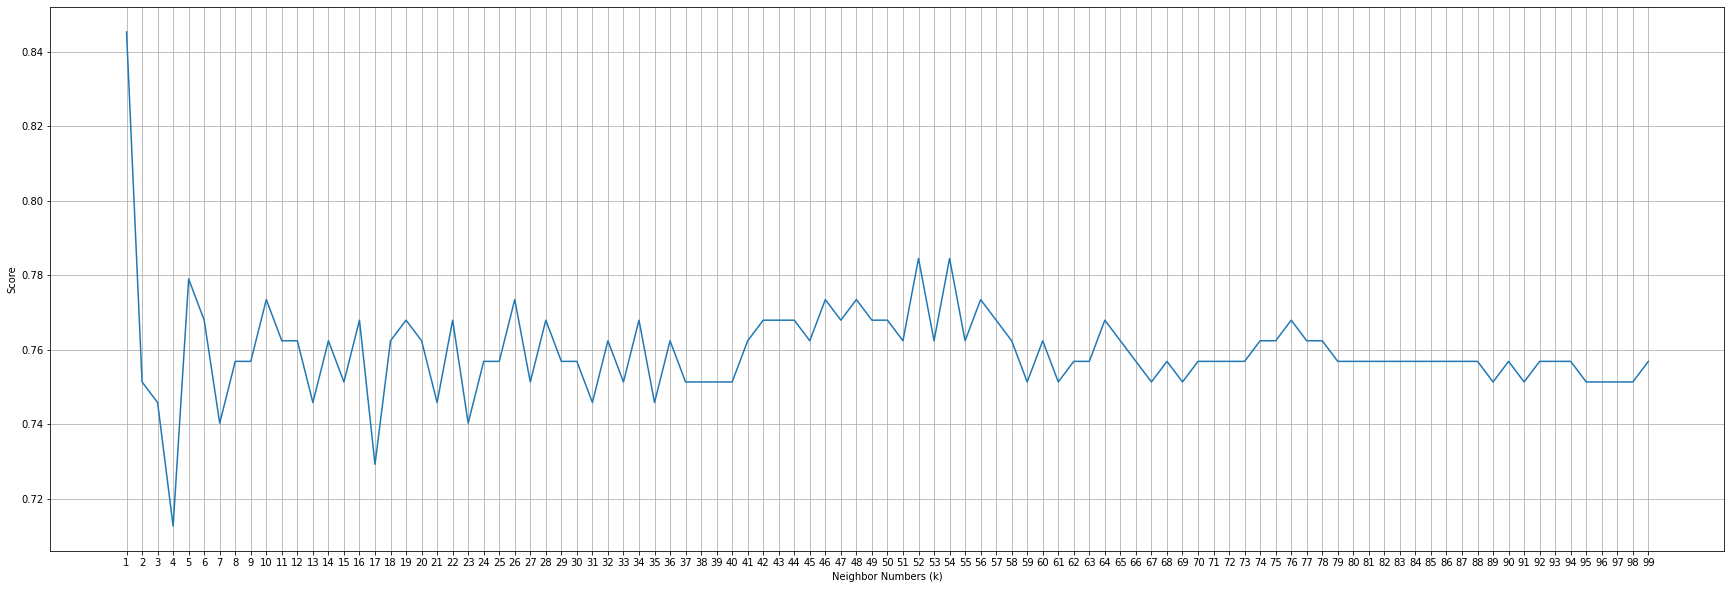

In [54]:
plt.figure(figsize=(30, 10))
plt.xticks(number_of_neighbors)

plt.xlabel('Neighbor Numbers (k)')
plt.ylabel('Score')

plt.grid()
plt.xticks(number_of_neighbors)
_ = plt.plot(number_of_neighbors, knn_neighbors_scores)
plt.show()

## Confusion Matrix

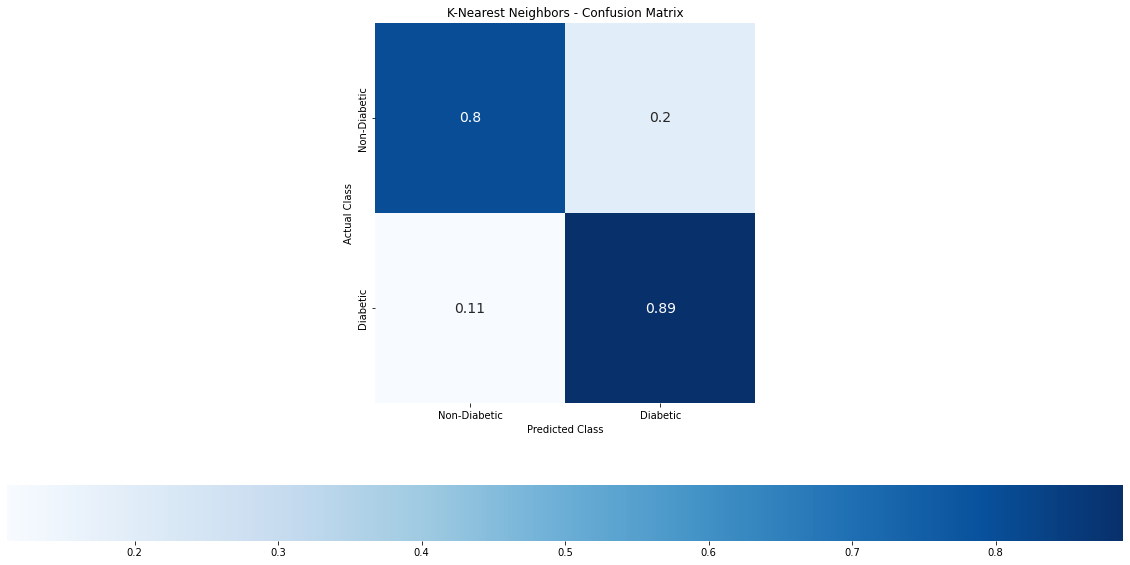

In [55]:
cmatrix(y_test, y_pred_knn, title='K-Nearest Neighbors')

# Random Forest

A forest of decision trees in which the best one survives the longest

In [56]:
best_params_rf = {
  'bootstrap': False,
  'max_depth': 60,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 600
}

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = make_pipeline(
  MinMaxScaler(),
  RandomForestClassifier(
    random_state=RANDOM_SEED,
    # n_estimators=700,
    # max_depth=75,
    **best_params_rf
  )
)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print('normal', clf_rf.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_rf))
print('auc', auc(clf_rf))

normal 0.861878453038674
balanced 0.8622100122100123
auc 0.9659340659340659


In [58]:
clf_rf.score(X, y)

0.9722838137472284

## Hyperparameter optimization

A process to tune the hyper-parameters for it's most optimal resolution. It takes around a minute or so to compute, it's really slow, when you increase the number of iterations and fits, but it's worth it do it at least once per project, once finished that is.

Reference:
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [59]:
HYPERTUNE = True #@param {type:'boolean'}

In [60]:
if HYPERTUNE:
  from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]# Create the random grid

  random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
  }

In [61]:
if HYPERTUNE:
  rf_random = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state=RANDOM_SEED),
    param_distributions = random_grid,
    n_iter = 10,
    cv = 5,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs = -1
  )# Fit the random search model
  rf_random.fit(X_train_norm, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [62]:
if HYPERTUNE:
  display(rf_random.best_params_)

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [63]:
if HYPERTUNE:
  clf_rf_optimized = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(
      random_state=RANDOM_SEED,
      **rf_random.best_params_
    )
  )
  clf_rf_optimized.fit(X_train, y_train)
  y_pred_rf_optimized = clf_rf.predict(X_test)

  print('normal', clf_rf_optimized.score(X_test, y_test))
  print('balanced', balanced_accuracy_score(y_test, y_pred_rf_optimized))
  print('auc', auc(clf_rf_optimized))

normal 0.861878453038674
balanced 0.8622100122100123
auc 0.9659340659340659


In [64]:
if HYPERTUNE:
  display(clf_rf_optimized.score(X, y))

0.9722838137472284

## Confusion Matrix

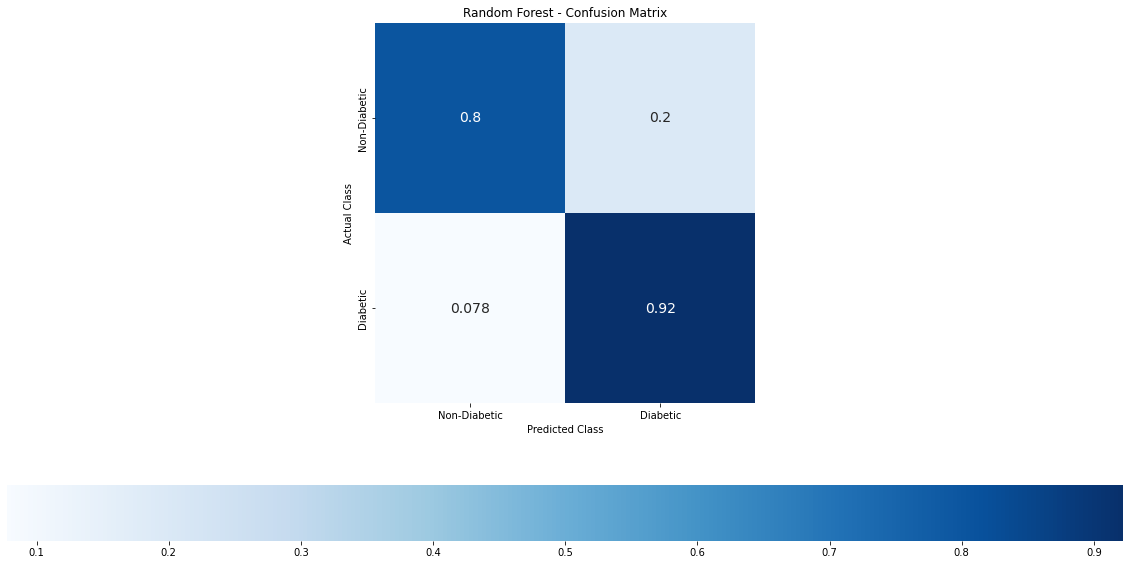

In [65]:
cmatrix(y_test, y_pred_rf, title='Random Forest')

# Support Vector Machine

A machine learning algorithm that creates hyperplanes to solve complex problems by dividing them into simpler ones

In [66]:
from sklearn.svm import SVC

clf_svc = make_pipeline(
  MinMaxScaler(),
  SVC(random_state=RANDOM_SEED, C=1.0, probability=True)
)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

print('normal', clf_svc.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_svc))
print('auc', auc(clf_svc))

normal 0.7734806629834254
balanced 0.7737484737484737
auc 0.8841269841269842


In [67]:
clf_svc.score(X, y)

0.7849223946784922

## Confusion Matrix

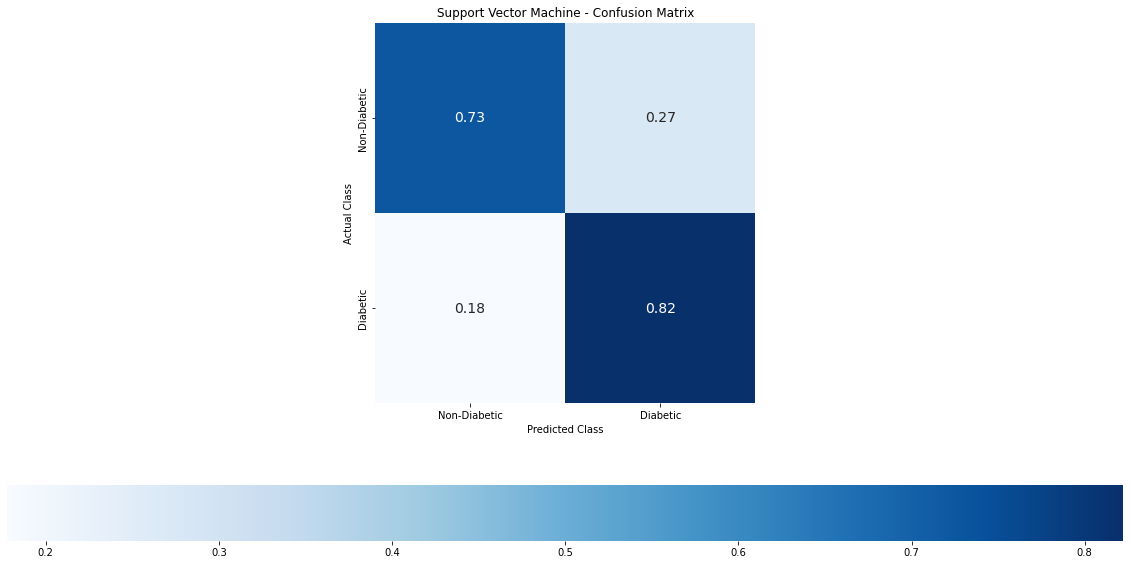

In [68]:
cmatrix(y_test, y_pred_svc, title='Support Vector Machine')

# LightGBM

Or Light Gradient Boosting Machine, is another gradient boosted technique implementation, open-source, and mainted by Microsoft

Reference:

- https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

In [69]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

clf_lgbm = make_pipeline(
  MinMaxScaler(),
  LGBMClassifier(
    random_state=RANDOM_SEED,
    learning_rate= 0.1,
    n_estimators= 5,
    # num_leaves= sp_randint(6, 50), 
    # min_child_samples= sp_randint(100, 500), 
    # min_child_weight= [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    # subsample= sp_uniform(loc=0.2, scale=0.8), 
    max_depth= 7,
    # colsample_bytree= sp_uniform(loc=0.4, scale=0.6),
    reg_alpha= 5,
    reg_lambda= 13,
  )
)
clf_lgbm.fit(X_train, y_train)
y_pred_lgbm = clf_lgbm.predict(X_test)

print('normal', clf_lgbm.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_lgbm))
print('auc', auc(clf_lgbm))

normal 0.7734806629834254
balanced 0.7737484737484737
auc 0.8362637362637363


In [70]:
clf_lgbm.score(X, y)

0.7937915742793792

## Confusion Matrix

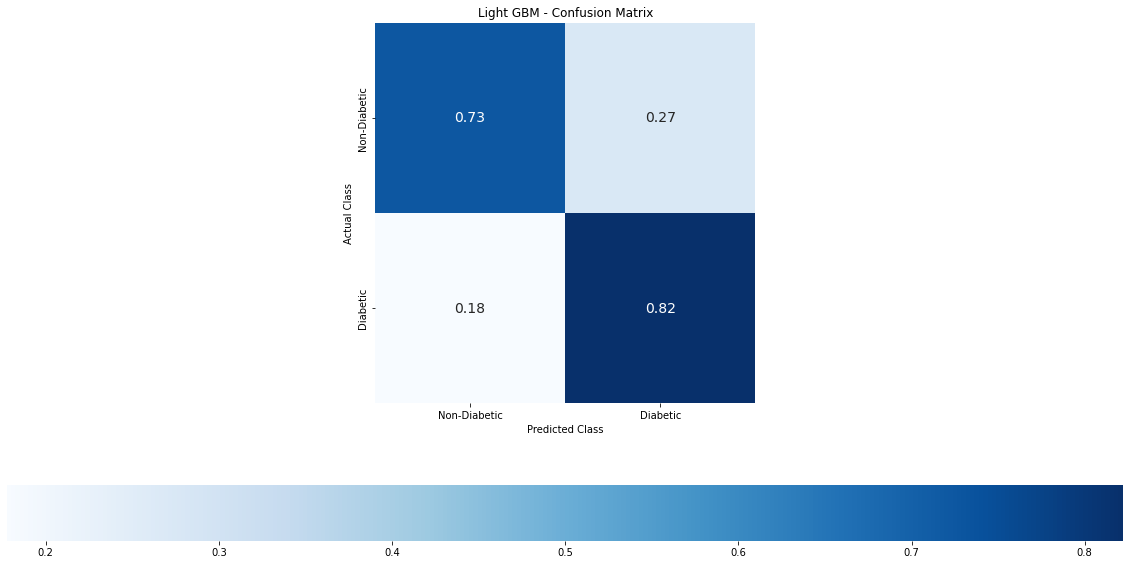

In [71]:
cmatrix(y_test, y_pred_lgbm, title='Light GBM')

# Voting Classifier

An ensembling technique to unify multiple estimators (algorithm techniques/untrained machine learning models)

In [72]:
from sklearn.ensemble import VotingClassifier

clf_log_new = LogisticRegression(random_state=RANDOM_SEED)
clf_rf_new = RandomForestClassifier(random_state=RANDOM_SEED)
clf_bayes_new = GaussianNB(var_smoothing=.3)
clf_xgboost_new = XGBClassifier(random_state=RANDOM_SEED)
clf_lgbm_new = LGBMClassifier(random_state=RANDOM_SEED)

eclf1 = VotingClassifier(
  estimators=[
    ('lr', clf_log_new),
    ('rf', clf_rf_new),
    ('gnb', clf_bayes_new),
    ('xgb', clf_xgboost_new),
    ('lgbm', clf_lgbm_new),
  ],
  voting='soft',
)
eclf1.fit(X_train_norm, y_train)
y_pred_eclf1 = eclf1.predict(X_test_norm)

print('normal', eclf1.score(X_test_norm, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_eclf1))
print('auc', auc(eclf1))

normal 0.8895027624309392
balanced 0.8899267399267399
auc 0.5437118437118437


## Confusion Matrix

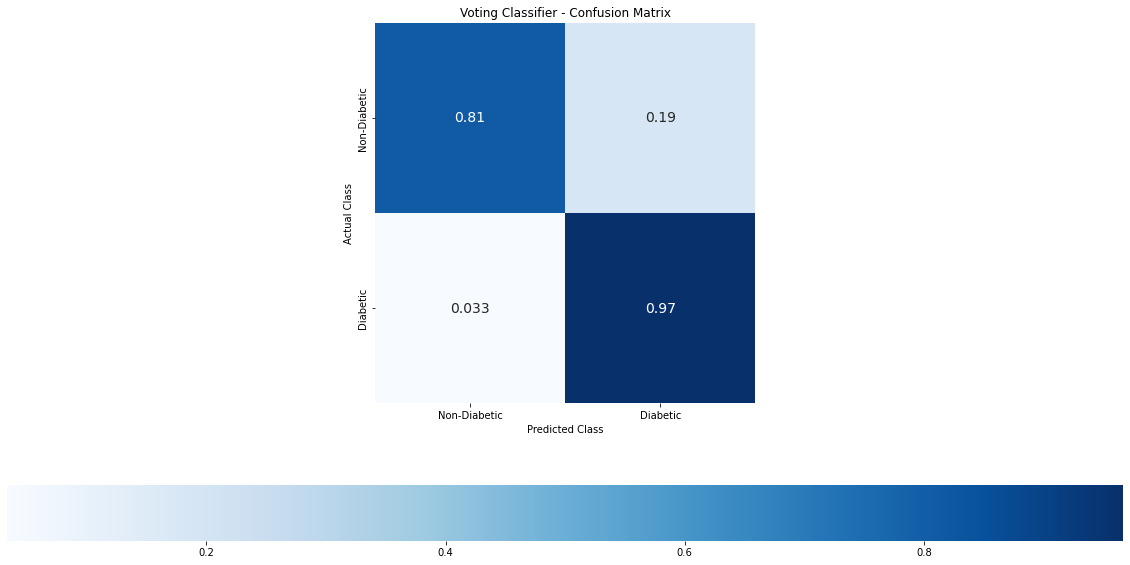

In [73]:
cmatrix(y_test, y_pred_eclf1, title='Voting Classifier')

# Conclusions

If you've come this far, seriously, thank you, and please, check out Vicent's notebook, it's a whole lote better and further explained than mine.

- [Pima Indians Diabetes - EDA & Prediction (0.906)](https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906)

But, what does mine have to offer that the rest of notebooks did not have? Distribution and bias consideration. It's something that, usually, tends to lower the score, but it's actually for the better, since it will be most performant when it's really needed.

Does this mean that a balanced set will not be biased? Not even a little, but it does help to tackle that side of the problem.

And, Random Forest, even though all of the models performed greatly! It's the highest one, it got a freaking 96.59 of AUC, that's huuugeee!!

And once again, thank you for coming this far, wether you're seeing this on Kaggle or Github, kindly let me know if there's something I did not consider or that you liked, whatever :)